### 使用するデータ
---
学校保健の統計データ(オープンデータ)

#### x(説明変数)
---
身長

#### y(目的変数)
---
男性 = 1, 女性 = 0

#### 何をどのように予測するのか
---
身長という「特徴」から、正解(男性か女性か)を予測する


### 予測プログラム
---
#### 1. 1件ずつdata.csvを読み込む
#### 2. ヒストグラムにプロットする(データの視覚化)
#### 3. 身長から性別を判定するプログラムを書く
* 判定ルール: 171以上は男性という判定ルール
#### 4. 正解率を見る(実データの男性の数/男性として判定した数)

In [3]:
# ライブラリのインポート
import pandas as pd

# データの読み込み
df = pd.read_csv("jh_heights.csv")

In [4]:
# データの概要をDataFrameとして確認する
df.head()

,x,y
0,146,0
1,147,0
2,148,0
3,148,0
4,149,0


### データを視覚化する

In [5]:
# ライブラリのインポート
import matplotlib.pyplot as plt

#### ヒストグラムを描く

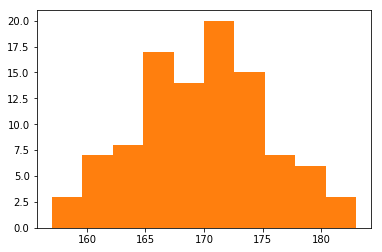

In [7]:
# 男性の身長に関するヒストグラム
plt.hist(df[df["y"] == 1]["x"])
plt.show()

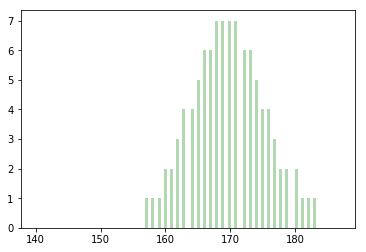

In [13]:
# ラベルを追加。また、binsを細かくして、わかりやすく加工する

plt.hist(df[df["y"] == 1]["x"] , bins=100, label="men 16 years old", range=(140, 187), alpha=0.3, color="green")
plt.show()

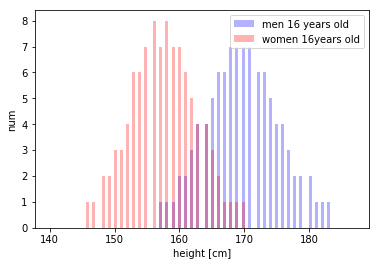

In [21]:
# 男性と女性を比較する

# range グラフ幅の調整,　alpha 重複部分を見やすくするために透過度を調整, color 色の指定 
plt.hist(df[df["y"] == 1]["x"] , bins=100, label="men 16 years old", range=(140, 187), alpha=0.3, color="blue")
plt.hist(df[df["y"] == 0]["x"], label="women 16years old", bins=100, range=(140, 187), alpha=0.3, color = "red")

# x軸とy軸にそれぞれラベルを追加
plt.xlabel("height [cm]")
plt.ylabel("num")

# 凡例の表示
plt.legend()
plt.show()

#### 分析仮説
---
171cm以上であれば、確実に男性と判定できるのではないか?

##### 男性と判定するプログラムを定義

In [22]:
# 男性判定プログラム　説明変数はheight（身長）から取得する
def is_man(height):
    # もし身長が171cmよりも大きかったら、男性
    if height > 171:
        return True
    # そうでなければ、女性
    else:
        return False

In [23]:
# 判定結果(answer)の配列を作成する
answers = []
for i, row in df.iterrows():
    answer = is_man(row['x'])
    answers.append(answer)

#### 解説
---
DataFrame は 2次元データなので、for文を縦方向にループさせる場合と横方向にループさせる場合で方法が異なります。縦方向は iterrows メソッド、横方向は iteritems メソッドを使います。

In [24]:
#  判定結果 実データの男性の数 / 判定プログラムで男性と判定した数
(answers == df['y']).sum() / len(answers)

0.68500000000000005

** 正答率 ** 68.5%